# Loan Prediction Model

## Machine Learning ALP - Hagen Kwik & Dhammiko Dharmawan

## Setup

### Import Libraries

In [33]:
# library for mathematical functions and data preprocessing such as table, etc
import pandas as pd
import numpy as np
from scipy import stats

# Library for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# Library for machine learning functions/algorithms
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


### Load Dataset

In [2]:
# data itself
url = 'lending_club_loan_two.csv'
# description of each column
url_info = 'lending_club_info.csv'
df_before = pd.read_csv(url)
df_info = pd.read_csv(url_info)
df_before.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [4]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Exploratory Data Analysis & Data Preprocessing & Data Cleaning

### Remove Useless Columns

In [5]:
# Reason:
# These features lack direct relevance to a person's ability to secure a loan. 
# grade and subgrade, summarizes the loan status, can be substituted with existing data like interest rates and annual income

columns_to_drop = ['emp_title', 'address', 'issue_d', 'title', 'earliest_cr_line', 'initial_list_status', 'grade', 'sub_grade', 'purpose']
df_before = df_before.drop(columns=columns_to_drop)

In [6]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_length            377729 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   dti                   396030 non-null  float64
 10  open_acc              396030 non-null  float64
 11  pub_rec               396030 non-null  float64
 12  revol_bal             396030 non-null  float64
 13  revol_util            395754 non-null  float64
 14  total_acc             396030 non-null  float64
 15  

### Check Dataset proportion

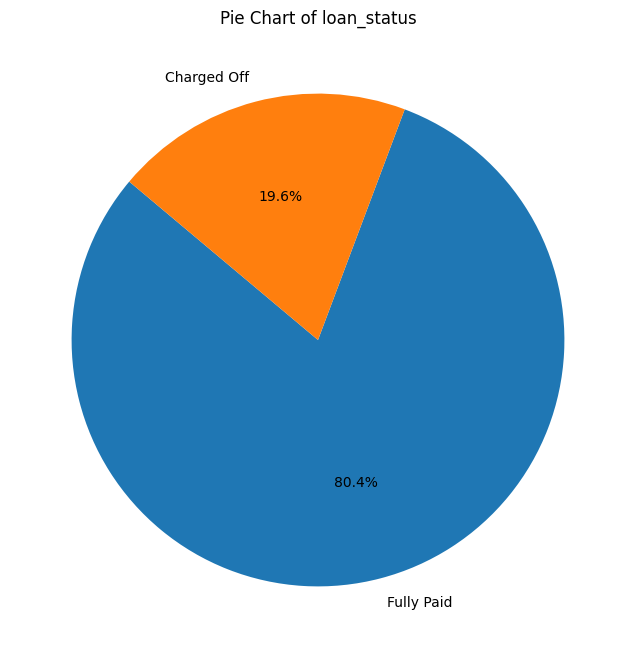

In [7]:
column_name = 'loan_status'

data_counts = df_before[column_name].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_name}')
plt.show()

### Visualise proportion Before

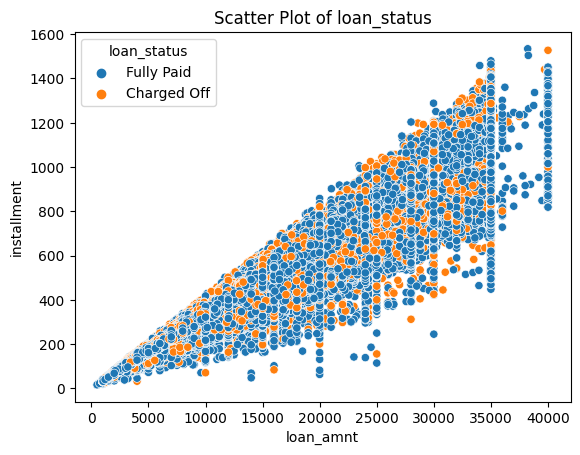

In [8]:
# Assuming 'loan_status' is the target column
sns.scatterplot(x='loan_amnt', y='installment', hue='loan_status', data=df_before)
plt.title('Scatter Plot of loan_status')
plt.show()

### Check data values

In [9]:
df_before.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [10]:
# Check which column needs fixing
for column in df_before.columns:
    unique_values = df_before[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'loan_amnt':
[10000.  8000. 15600. ... 36275. 36475.   725.]

Unique values in 'term':
[' 36 months' ' 60 months']

Unique values in 'int_rate':
[11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 14.49 18.99

### Fill Misssing Values

These methods are chosen based on their commonality and effectiveness in handling missing values in different scenarios, also this approach is widely accepted and utilized as a standard method for addressing missing data.

In [31]:
df_before['emp_length'].fillna(df_before['emp_length'].mode()[0], inplace=True)
df_before['revol_util'].fillna(df_before['revol_util'].mean(), inplace=True)
df_before['mort_acc'].fillna(df_before['mort_acc'].mean(), inplace=True)
df_before['pub_rec_bankruptcies'].fillna(df_before['pub_rec_bankruptcies'].mean(), inplace=True)

### Label Encoding

In [13]:
# label encoder and fit_transform is a function that changes/remap string into number based on alphabetical order
le = LabelEncoder() 
df_before['term'] = le.fit_transform(df_before['term'])
# 36 months = 0,  60 months = 1

df_before['emp_length'] = le.fit_transform(df_before['emp_length'])
# '1 year' = 0, '10+ years' = 1, '2 years' = 2, '3 years' = 3, '4 years' = 4, '5 years' = 5,   
# '6 years' = 6, '7 years' = 7, '8 years' = 8,  '9 years' = 9, '< 1 year' = 10

df_before['home_ownership'] = le.fit_transform(df_before['home_ownership'])
# 'ANY' = 0, 'MORTGAGE' = 1, 'NONE' = 2, 'OTHER' = 3, 'OWN' = 4, 'RENT' = 5

df_before['verification_status'] = le.fit_transform(df_before['verification_status'])
# 'Not Verified' = 0, 'Source Verified' = 1, 'Verified' = 2

df_before['loan_status'] = le.fit_transform(df_before['loan_status'])
# 'Charged Off' = 0, 'Fully Paid' = 1 

df_before['application_type'] = le.fit_transform(df_before['application_type'])
# 'DIRECT_PAY' = 0, 'INDIVIDUAL' = 1, 'JOINT' = 2

### Check For outliers

In [35]:
z_score_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc']

total_entries = len(df_before)

for var in z_score_vars:
    z_scores = stats.zscore(df_before[var])
    outliers = (np.abs(z_scores) > 3)
    num_outliers = np.sum(outliers)
    percentage_outliers = (num_outliers / total_entries) * 100
    print(f'Number of outliers in {var}: {num_outliers}')
    print(f'Percentage of outliers in {var}: {percentage_outliers:.2f}%\n')

Number of outliers in loan_amnt: 185
Percentage of outliers in loan_amnt: 0.05%

Number of outliers in int_rate: 756
Percentage of outliers in int_rate: 0.19%

Number of outliers in installment: 5050
Percentage of outliers in installment: 1.28%

Number of outliers in annual_inc: 3197
Percentage of outliers in annual_inc: 0.81%

Number of outliers in dti: 12
Percentage of outliers in dti: 0.00%

Number of outliers in open_acc: 4879
Percentage of outliers in open_acc: 1.23%

Number of outliers in pub_rec: 8019
Percentage of outliers in pub_rec: 2.02%

Number of outliers in revol_bal: 4790
Percentage of outliers in revol_bal: 1.21%

Number of outliers in total_acc: 3401
Percentage of outliers in total_acc: 0.86%



### Remove Outlier (NNGA BISA 100 PERSEN HILANG outlier E< CARI CARA>)

In [33]:
columns_with_outliers = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

df_remove_outliers = df_before.copy()

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        # Calculate IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Call the function to remove outliers
df_no_outliers = remove_outliers(df_remove_outliers, columns_with_outliers)


In [34]:
z_score_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

total_entries = len(df_no_outliers)
outlier_indices = set()

for var in z_score_vars:
    z_scores = stats.zscore(df_no_outliers[var])
    outliers = (np.abs(z_scores) > 3)
    outlier_indices.update(np.where(outliers)[0])

num_unique_outliers = len(outlier_indices)
percentage_outliers = (num_unique_outliers / total_entries) * 100

print(f'Number of unique outliers across all variables: {num_unique_outliers}')
print(f'Percentage of unique outliers across all variables: {percentage_outliers:.2f}%')

Number of unique outliers across all variables: 5832
Percentage of unique outliers across all variables: 2.15%


### UnderSampling and Over Sampling (MASIH MIKIR GIMANA)

In [ ]:
# Undersampling dari 80% (330 000) ke 40% (165 000) majority data class
# Oversmapling minoetiy class dari 20% (70 000) ke 40% (140 000) juga
# Cari alasanya kenapa harus pakai angka tersebut dari 80 ke 40 % dan 20% ke 40%
# Pakai random sampling buat undersampling
# over sampling pakai smote?

## Random Forest Classification (Model Generation)

In [ ]:
# SPLIT BELUM BIKIN

In [32]:
# common test size is 20 and random state is not necessary since it doesnt really affect the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

### GRID SEARCH (COBA KALAU MAU)

In [8]:
# Create and train the SVM on subset1

# Hyper Paramaters:

# Create an empty dictionary to store n_estimator and corresponding accuracy scores
# n estimator is the number of trees in the forest
n_estimator_accuracy = {}

for i in range(50, 101):
    
    # Calculate accuracy and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    n_estimator_accuracy[i] = accuracy

# get the key/n estimator with the highest accuracy
best_n_estimator = max(n_estimator_accuracy, key=n_estimator_accuracy.get)
# get the value of the accuracy
best_accuracy_RFC = n_estimator_accuracy[best_n_estimator]

print(f"The best n_estimate value is {best_n_estimator} with an accuracy of {best_accuracy_RFC:.5f}")

KeyboardInterrupt: 

### GRID SEARCH VALIDATION

In [22]:
RFC = RandomForestClassifier(n_estimators=75, random_state=0, bootstrap=True, criterion="gini", max_depth=None)
RFC.fit(X_train, y_train)

# Make predictions on the test set (subset1)
y_pred_test = RFC.predict(X_test)

# Use subset2 for real data testing
# Assign the predictor and target variables (X and y)
X_real_test = subset2.drop(target_column, axis=1)
y_real_test = subset2[target_column].values

# Make predictions on the real test data (subset2)
y_pred_real_test = RFC.predict(X_real_test)

# Calculate accuracy on the test set (subset1)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate accuracy on the "real" test data (subset2)
accuracy_real_test = accuracy_score(y_real_test, y_pred_real_test)

print("Accuracy on test set (subset1):", accuracy_test)
print("Accuracy on real test data (subset2):", accuracy_real_test)

Accuracy on test set (subset1): 0.8030349790630633
Accuracy on real test data (subset2): 0.8029442213973689


## Evaluation

### Confusion Matrix

In [24]:
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix\n", cm)

Confusion Matrix
 [[  4785  51170]
 [  4993 224194]]


In [23]:
target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

 Charged Off       0.49      0.09      0.15     55955
  Fully Paid       0.81      0.98      0.89    229187

    accuracy                           0.80    285142
   macro avg       0.65      0.53      0.52    285142
weighted avg       0.75      0.80      0.74    285142



### F1 Score

In [16]:
TN, FP, FN, TP = cm.ravel()

# Calculate Accuracy
# (TP+TN)/total sample
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Calculate Precision
# TP/(TP+FP)
# Precision is a measure of the accuracy of positive predictions made by the model. It answers the question: "Of all the instances predicted as positive, how many were actually positive?"
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Calculate Recall
# TP/(TP+FN)
# Recall measures the model's ability to identify all the positive instances correctly. It answers the question: "Of all the actual positive instances, how many were correctly predicted?"
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# Calculate Specificity
# TN/(TN+FN)
# specificity measures the model's ability to identify negative instances correctly. It answers the question: "Of all the actual negative instances, how many were correctly predicted?"
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Calculate F1 Score
# (2*Precision*Recall)/(Precision+Recall)
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

Accuracy: 0.8030349790630633
Precision: 0.8141732397844308
Recall: 0.9782142966224088
Specificity: 0.08551514609954428
F1 Score: 0.8886871693842644


### AUC Score (BELUM SELESAI)

##### JESALIN APA ITU DAN HASIL?

To validate the robustness of our model, we utilize the roc_auc_score function from sk-learn where it automatically calculates the AUC score. A higher AUC signifies better discrimination ability, reinforcing the findings from the confusion matrix and F1 score. The AUC serves as a confirmation metric, providing a holistic view of the model's performance across different threshold values.

AUC Score: 0.6871117002410337


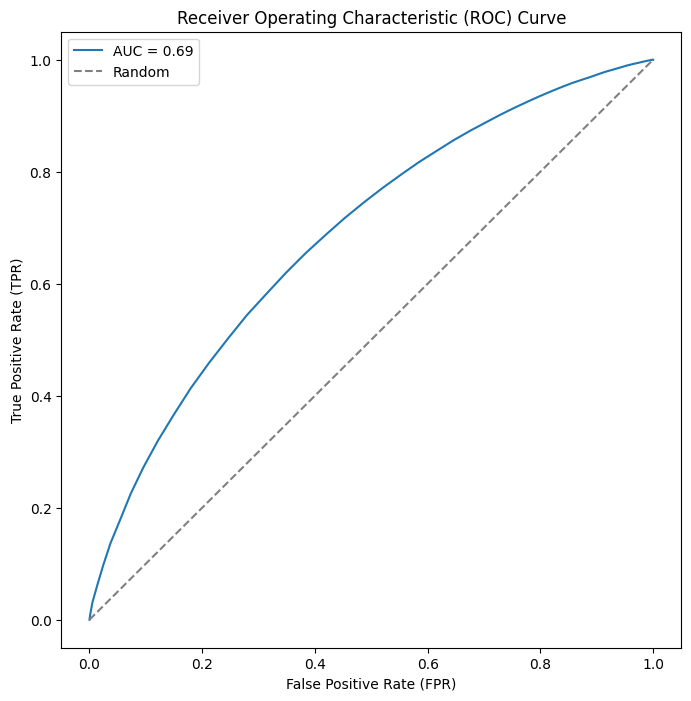

In [17]:
# Assuming you have the predicted probabilities for the positive class
y_prob_test = RFC.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob_test)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# is 69 auc score good what does it mean, what can i do to increase it?

## Conclusion???